In [1]:
import scikit_canny

import numpy as np
import matplotlib.pyplot as plt

import torch

import pandas as pd
import skimage

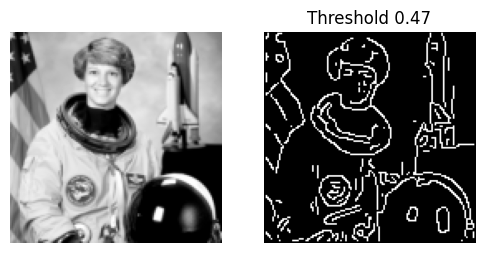

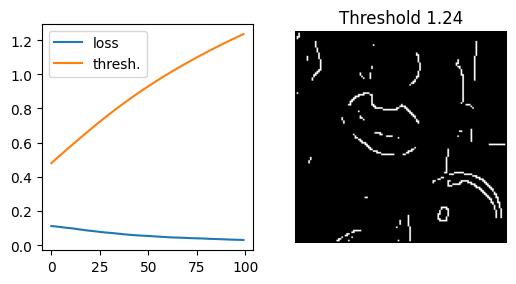

In [3]:
# Differentiable canny module
df_canny = scikit_canny.DifferentiableCannyModule(device='cpu', adaptive_threshold=True)
optim = torch.optim.Adam(df_canny.parameters(), lr=.01)

# Visualize example image
img = skimage.data.astronaut()[:,:,0]
img = skimage.transform.resize(img, (128,128))
edges = df_canny(img)
_, axs = plt.subplots(1,2,figsize=(6,3),dpi=100)
axs[0].imshow(img, cmap='gray')
axs[1].imshow(edges.cpu().detach().numpy().squeeze(), cmap='gray')
axs[0].axis('off')
axs[1].axis('off')
axs[1].set(title=f"Threshold {df_canny.threshold.item():0.2f}")
plt.show()


## Optimize (minimize edges)
steps = 100
hist = []
for _ in range(steps):
    edges = df_canny(img)
    
    optim.zero_grad()
    loss = (edges**2).mean()
    loss.backward()
    optim.step()
    
    hist.append({'loss': loss.item(),
                 'threshold': df_canny.threshold.item()})
hist = pd.DataFrame(hist)


## Visualize result
_, axs = plt.subplots(1,2,figsize=(6,3), dpi=100)
axs[0].plot(hist.loss, label = 'loss')
axs[0].plot(hist.threshold, label = 'thresh.')
axs[0].legend()
axs[1].imshow(edges.cpu().detach().numpy().squeeze(), cmap='gray')
axs[1].axis('off')
axs[1].set(title=f"Threshold {df_canny.threshold.item():0.2f}")
plt.show()

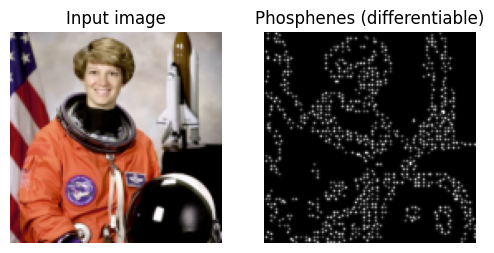

In [6]:
from imgproc import ImageProcessor, PhospheneSimulator, DifferentiablePhospheneSimulator


# Differentiable canny and simulator
df_canny = scikit_canny.DifferentiableCannyModule(sigma = 1., threshold=120/255, device='cpu', adaptive_threshold=False)
simulator =  DifferentiablePhospheneSimulator(phosphene_resolution=(50,50), size=(128,128),
                                              jitter=0.25,intensity_var=0.9,sigma=0.60,intensity=1.)
gray = skimage.transform.resize(skimage.data.astronaut(),(128,128))
gray = skimage.color.rgb2gray(gray)
edges = df_canny(gray)
phs_diff = simulator(edges, dilate_mask=True)

_, axs = plt.subplots(1,2,figsize=(6,3), dpi=100)
axs[0].imshow(colors)
axs[0].axis('off')
axs[0].set(title="Input image")
axs[1].imshow(phs_diff.detach().cpu().numpy().squeeze(), cmap='gray')
axs[1].axis('off')
axs[1].set(title="Phosphenes (differentiable)")

plt.show()